In [55]:
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

In [56]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
print(X_train_full.shape)
print(y_train_full.shape)
print(X_train_full.dtype)
print(y_train_full.dtype)

(60000, 28, 28)
(60000,)
uint8
uint8


#### Prepare data
1. assign following datatypes to the arrays:
   - X_train -> 'float32'
   - y_train -> 'int64'
2. reshape X_train to 2-dimensional array.
Note:
   - it should have the same amount of samples/rows.
3. split the training data into (X_train, y_train) and (X_valid, y_valid), set the size of the validation dataset to 20% of the data and set random state = 42.

In [57]:
X_train_full = np.array(X_train_full, dtype = 'float32').reshape((60000, 28*28)) / 255
y_train_full = np.array(y_train_full, dtype = 'int64')
print(X_train_full.shape)
print(y_train_full.shape)
print(X_train_full.dtype)
print(y_train_full.dtype)

(60000, 784)
(60000,)
float32
int64


In [58]:
X_test = np.array(X_test, dtype = 'float32').reshape((10000, 28*28)) / 255
y_test = np.array(y_test, dtype = 'int64')
print(X_test.shape)
print(y_test.shape)
print(X_test.dtype)
print(y_test.dtype)

(10000, 784)
(10000,)
float32
int64


In [59]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_train.dtype)
print(y_train.dtype)

(48000, 784)
(48000,)
float32
int64


In [60]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

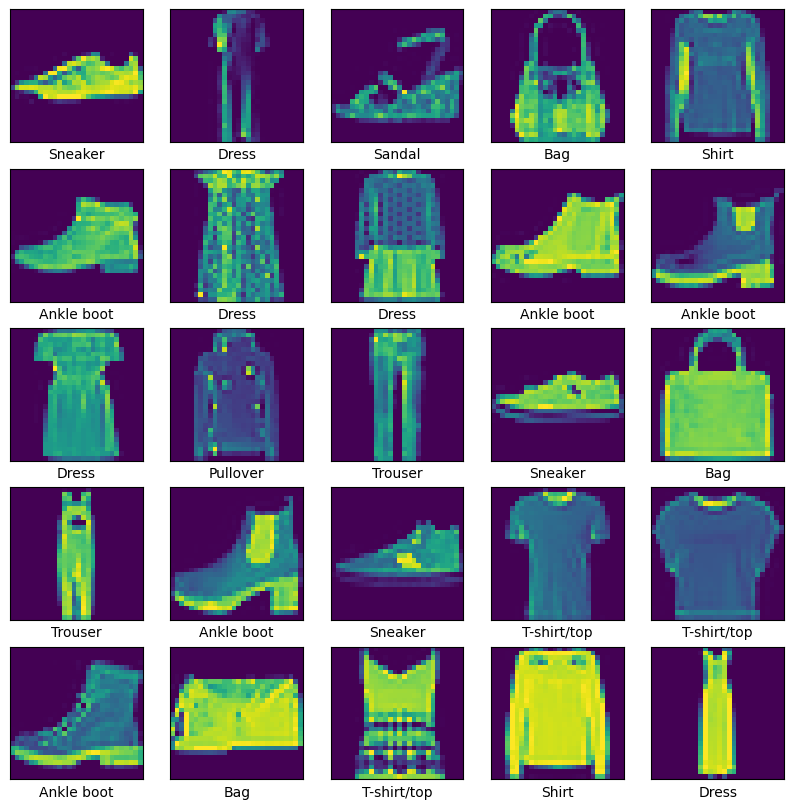

In [61]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]) # empty x-ticks
    plt.yticks([]) # empty y-ticks
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28,28))
    plt.xlabel(label_names[y_train[i]])
plt.show()

In [29]:
import keras

In [62]:
# the original labels are the digits 0-9
# that means an image of a written "0" has label 0.
# here we transform these to so-called one-hot vectors
# the one-hot vector has 10 dimensions (one for each class)
# and is all 0 except for the dimension corresponding to the label
# for example, label 2 would be encoded as [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# this conversion is necessary for training with keras
y_train = keras.utils.to_categorical(y_train)

Modelling

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [15]:
X_train.shape

(48000, 784)

In [36]:
model = Sequential()
model.add(Dense(3, activation='sigmoid', input_shape=(None,28*28))) # output layer with 10 nodes (for 10 classes) and softmax activation
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, None, 3)           2355      
                                                                 
 dense_8 (Dense)             (None, None, 5)           20        
                                                                 
 dense_9 (Dense)             (None, None, 10)          60        
                                                                 
Total params: 2,435
Trainable params: 2,435
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.05), metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=1,
                    epochs=10,
                    verbose=0,
)

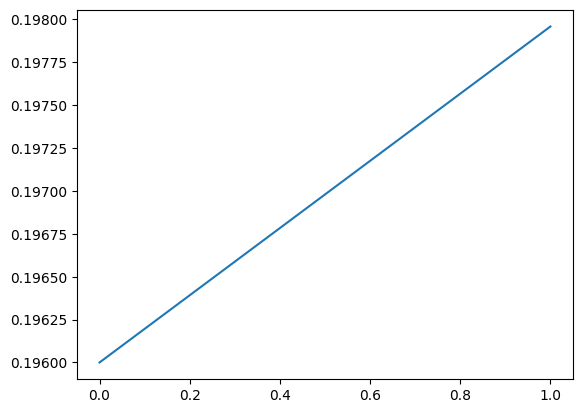

In [41]:
plt.plot(history.history['accuracy'])

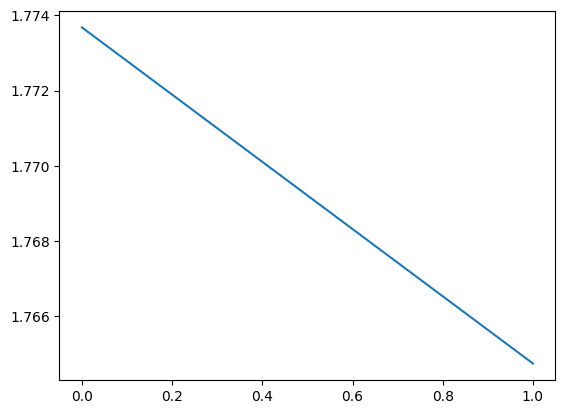

In [42]:
plt.plot(history.history['loss'])

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [63]:
y_hat_valid_oh = model.predict(X_valid)

# convert back from one-hot encoded predictions:
y_hat_valid = np.argmax(y_hat_valid_oh, axis=-1)

accuracy = accuracy_score(y_valid, y_hat_valid)
print(f"Accuracy on validation set: {accuracy}")

375/375 [==============================] - 0s 1ms/step
Accuracy on validation set: 0.19741666666666666


**Task**: Experiment with different numbers and sizes of layers to find the best possible model

* Evaluate your favorite model on the independent test
* generate the scikit learn classification report
* and the confusion matrix

In [64]:
y_hat_test_oh = model.predict(X_test)

# convert back from one-hot encoded predictions:
y_hat_test = np.argmax(y_hat_test_oh, axis=-1)

accuracy = accuracy_score(y_test, y_hat_test)
print(f"Accuracy on validation set: {accuracy}")

313/313 [==============================] - 1s 2ms/step
Accuracy on validation set: 0.1969


In [65]:
print(classification_report(y_test, y_hat_test, target_names=label_names))

              precision    recall  f1-score   support

 T-shirt/top       0.00      0.00      0.00      1000
     Trouser       0.00      0.00      0.00      1000
    Pullover       0.00      0.00      0.00      1000
       Dress       0.00      0.00      0.00      1000
        Coat       0.00      0.00      0.00      1000
      Sandal       0.33      0.99      0.49      1000
       Shirt       0.00      0.00      0.00      1000
     Sneaker       0.00      0.00      0.00      1000
         Bag       0.14      0.98      0.25      1000
  Ankle boot       0.00      0.00      0.00      1000

    accuracy                           0.20     10000
   macro avg       0.05      0.20      0.07     10000
weighted avg       0.05      0.20      0.07     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


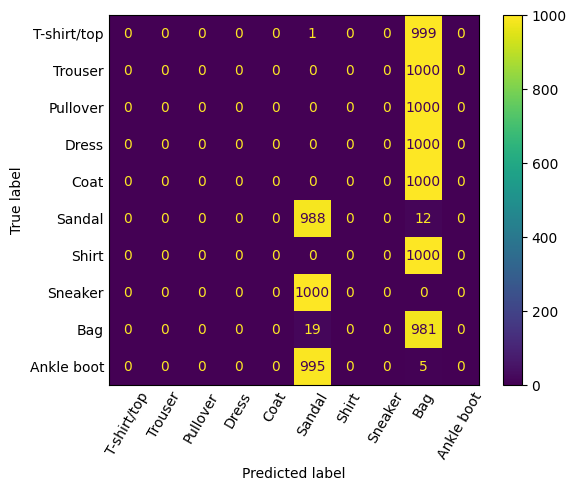

In [66]:
cm = confusion_matrix(y_test, y_hat_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)

disp.plot()

plt.tick_params(axis=u'both', which=u'both',length=0)
plt.tick_params(axis='x', labelrotation=60)
plt.grid(False)

plt.show()